In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
mnist = keras.datasets.mnist
(tr_image, tr_label), (te_image, te_label) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
tr_image.shape, tr_label.shape

((60000, 28, 28), (60000,))

In [6]:
te_image.shape, te_label.shape

((10000, 28, 28), (10000,))

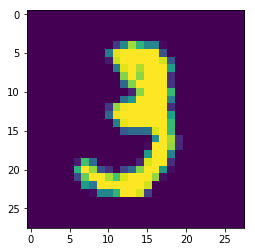

In [7]:
plt.figure()
plt.imshow(tr_image[10])
plt.show()

In [0]:
label_name = list('0123456789')

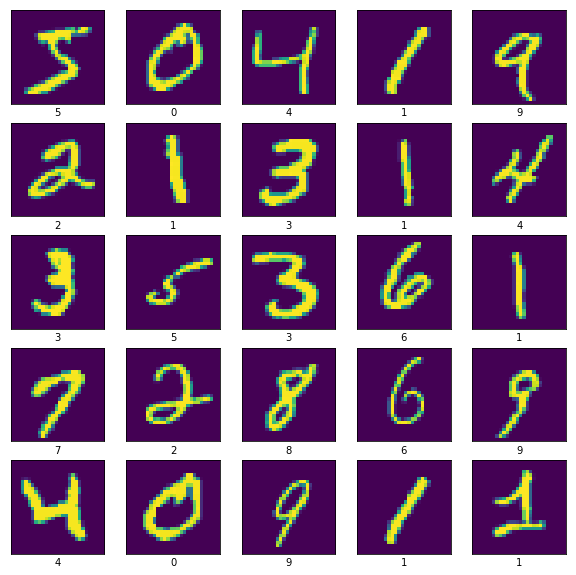

In [10]:
plt.figure(figsize = (10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(tr_image[i])
    plt.xlabel(label_name[tr_label[i]])
plt.show()

In [0]:
# nomalization
tr_image = tr_image.reshape(60000, 784).astype('float32') / 255.0
te_image = te_image.reshape(10000, 784).astype('float32') / 255.0

In [0]:
# one-hot encoding
tr_label = np_utils.to_categorical(tr_label)
te_label = np_utils.to_categorical(te_label)

In [13]:
tr_image.shape

(60000, 784)

In [0]:
val_image = tr_image[50000:]
val_label = tr_label[50000:]
tr_image  = tr_image[:50000]
tr_label  = tr_label[:50000]

In [15]:
val_image.shape

(10000, 784)

In [17]:
model = Sequential()

model.add(Dense(units = 64, input_dim = 28 * 28, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(units = 10, activation = 'softmax'))

In [18]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [19]:
hist = model.fit(tr_image, tr_label, epochs = 1000, batch_size = 32, validation_data = (val_image, val_label))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 50000 samples, validate on 10000 samples
Epoch 1/1000
50000/50000 [==============================] - 3s 62us/step - loss: 0.7175 - acc: 0.8081 - val_loss: 0.3391 - val_acc: 0.9027
Epoch 2/1000
50000/50000 [==============================] - 3s 51us/step - loss: 0.3279 - acc: 0.9056 - val_loss: 0.2786 - val_acc: 0.9175
Epoch 3/1000
50000/50000 [==============================] - 3s 50us/step - loss: 0.2779 - acc: 0.9197 - val_loss: 0.2459 - val_acc: 0.9279
Epoch 4/1000
50000/50000 [==============================] - 3s 51us/step - loss: 0.2454 - acc: 0.9297 - val_loss: 0.2188 - val_acc: 0.9364
Epoch 5/1000
50000/50000 [==============================] - 3s 51us/step - loss: 0.2201 - acc: 0.9360 - val_loss: 0.2027 - val_acc: 0.9431
Epoch 6/1000
50000/50000 [==============================] - 3s 51us/step - loss: 0.1995 - acc: 0.9420 - val_loss: 0.1943 - val_acc: 0.9457
Epoch 7/1000
50000/50

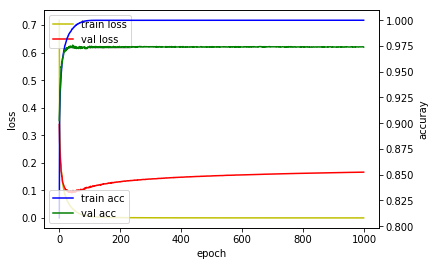

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()